In [81]:
import numpy as np
import cv2 as cv

from sklearn.externals import joblib
from matplotlib import pyplot as plt

import math
import pytesseract
from PIL import Image

In [82]:
clf = joblib.load('plate.pkl') 

In [131]:
test = Image.open("./cars/img/S_8167620760584.jpg")
testImage = np.asarray(test)
outImage = cv.imread("./cars/img/S_8167620760584.jpg")
grayImage = np.asarray(test.convert("L"))
thres2 = cv.adaptiveThreshold(grayImage,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,31,5)
_,contours,_ = cv.findContours(thres2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE);
features = []
x,y,w,h = 0,0,0,0,
j = 0
resultImage = []
for contour in contours:
    area = cv.contourArea(contour);
    if area > 1000 : 

        [x,y,w,h] = cv.boundingRect(contour);
        outputRect = testImage[y:y+h,x:x+w,:]
        j+=1
        high,width,channel = outputRect.shape
        f1 = width/high
        f2 = math.log(width*high)
        #grayScale -> Binary Threshold -> Histogram
        imageGray = cv.cvtColor(outputRect,cv.COLOR_RGB2GRAY)
        adaptive = cv.adaptiveThreshold(imageGray,255,
                                        cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv.THRESH_BINARY,
                                        31,5)

        #histogram
        hist = np.histogram(adaptive)
        f3,f4 = hist[0][0],hist[0][-1]
        f3 = math.log(f3) if f3 != 0 else 0
        f4 = math.log(f4) if f4 != 0 else 0
        f5 = f3/f4 if f4 != 0 else 0   # f5 = f4 != 0 ? f3/f4 : 0 
        feature = np.asarray([f1,f2,f3,f4,f5])
        features.append(feature)
        result = clf.predict([feature])[0]
        if(result == 1) :
            cv.rectangle(outImage, (x,y), (x+w, y+h), (0,255,0), 10);
            cv.imwrite('./cars/tmp/adaptive_{:03}.jpg'.format(j),adaptive)
            cv.imwrite('./cars/tmp/output_{:03}.jpg'.format(j),testImage[y:y+h,x:x+w,:])
            resultImage.append(imageGray)



['|\n|\n\nกิค 4262', '']


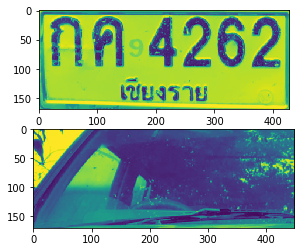

In [132]:
resultString = []
plt.figure()
j = 1

for i in resultImage :
    plt.subplot(len(resultImage),1,j)
    plt.imshow(i)
    j+=1
    r = pytesseract.image_to_string(i,lang='tha')
    resultString.append(r)
    
print(resultString)

In [138]:
x = resultImage[0]
x

array([[231, 239, 240, ..., 150, 136, 129],
       [244, 243, 239, ..., 197, 179, 151],
       [245, 241, 237, ..., 215, 210, 190],
       ...,
       [185, 186, 177, ..., 187, 205, 203],
       [182, 184, 182, ..., 195, 207, 199],
       [179, 188, 185, ..., 200, 198, 198]], dtype=uint8)

In [139]:
x = cv.adaptiveThreshold(x,255,
                                        cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv.THRESH_BINARY,
                                        31,5)

x

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0, 255, 255],
       [255, 255, 255, ...,   0, 255, 255],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

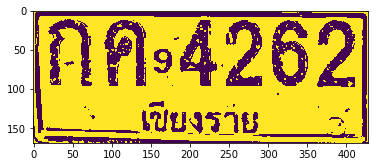

In [140]:
plt.imshow(x)

In [203]:
from scipy.ndimage.measurements import label,find_objects
from scipy import ndimage

In [176]:
labeled_array, num_features = label(~x)

In [186]:
objs = find_objects(labeled_array)

In [195]:
for obj in objs :
    if x[obj].size < 25 :
        x[obj] = 0


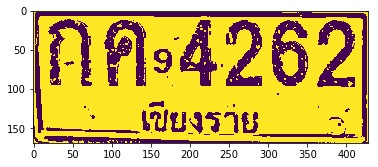

In [196]:
plt.imshow(x)

In [220]:
line = ~x.sum(axis=1)/255

110

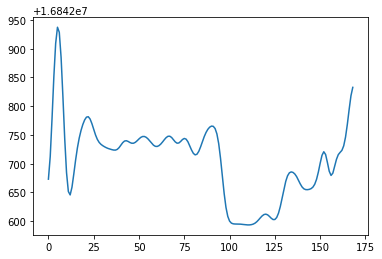

In [235]:
smoothLine = ndimage.gaussian_filter1d(line,2)
plt.plot(smoothLine)
np.argmin(smoothLine)


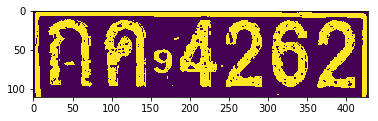

In [242]:
i = x[0:110]
plt.imshow(~i)

In [244]:
pytesseract.image_to_string(~i,lang='tha')


''